In [17]:
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import scatter_matrix
import seaborn as sns
import folium
import geopandas as gpd

In [2]:
#Describe Dataset here
filename = 'data\zillow\MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Dataset here
filename = 'data\zillow\Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Describe Dataset here
filename = 'data\zillow\Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Rental Price - Single Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sfr_sqft_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename,skipinitialspace=True)

#Rental Index Per Square Foot - All Homes
filename = 'data\zillow\City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Value - All Homes
filename = 'data\zillow\City_Zhvi_AllHomes.csv'
median_value_all_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Value Per Square Foot - All Homes
filename = 'data\zillow\City_MedianValuePerSqft_AllHomes.csv'
median_value_all_sqft_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Count of Home Sales
filename = 'data\zillow\Sale_Counts_City.csv'
sales_count_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#rental vacancy Rate - 10 years quarterly
filename = 'data/rental_vacancy_rate_10_yrs.csv'
rental_vacancy_rate_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Unemployment Rate - 20 years 
filename = 'data/unemployment_rate_20_years.csv'
unemployment_rate_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Unemployment Rate - by state 
filename = 'data/unemployment_rate_by_state.csv'
unemployment_rate_state_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Monthly Listing all homes - city
filename = 'data/zillow/MonthlyListings_NSA_AllHomes_City.csv'
monthly_listings_allhomes_city_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Sale Counts - city
filename = 'data/zillow/Sale_Counts_City.csv'
monthly_sale_counts_city_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Sale prices - city
filename = 'data/zillow/Sale_Prices_City.csv'
monthly_sale_prices_city_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

housing_crash_date = ['2008','12']
state_geo = 'data/folium/us-states.json'


# Annual Metrics Munging

### Median Rental Rate - sqft - Monthly

In [3]:
median_rental_price_sfr_sqft = median_rental_price_sfr_sqft_src.copy()
median_rental_price_sfr_sqft.drop(columns=['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr_sqft.columns],names=['Year','Month'])
median_rental_price_sfr_sqft = pd.DataFrame(median_rental_price_sfr_sqft.median()).reset_index()
median_rental_price_sfr_sqft.columns=['Year','Month','RentalRateSqFt']
median_rental_price_sfr_sqft['Year'] = median_rental_price_sfr_sqft['Year'].astype(int)
median_rental_price_sfr_sqft['Month'] = median_rental_price_sfr_sqft['Month'].astype(int)
median_rental_price_sfr_sqft.head()

,Year,Month,RentalRateSqFt
0,2010,1,0.670390
1,2010,2,0.776057
2,2010,3,0.786121
3,2010,4,0.784661
4,2010,5,0.785475


### Median Rental Rate - Monthly

In [4]:
median_rental_price_sfr = median_rental_price_sfr_src.copy()
median_rental_price_sfr.drop(columns=['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr.columns],names=['Year','Month'])
median_rental_price_sfr = pd.DataFrame(median_rental_price_sfr.median()).reset_index()
median_rental_price_sfr.columns=['Year','Month','RentalRate']
median_rental_price_sfr['Year'] = median_rental_price_sfr['Year'].astype(int)
median_rental_price_sfr['Month'] = median_rental_price_sfr['Month'].astype(int)
#median_rental_price_sfr.set_index('Year',inplace=True)
median_rental_price_sfr.head()

,Year,Month,RentalRate
0,2010,1,925.00
1,2010,2,1300.00
2,2010,3,1236.25
3,2010,4,1250.00
4,2010,5,1250.00


### Mortgage Rates - Monthly

In [5]:
mortgage_rates = mortgage_rates_src.copy()
mortgage_rates = mortgage_rates.drop(columns='TimePeriod')
mortgage_rates = mortgage_rates.rename(columns={'MortgageRateConventionalFixed':'MortgageRate'})
mortgage_rates['Date'] = pd.to_datetime(mortgage_rates['Date'], format='%Y-%m-%d')
mortgage_rates['Year'] = pd.DatetimeIndex(mortgage_rates['Date']).year
mortgage_rates['Month'] = pd.DatetimeIndex(mortgage_rates['Date']).month
mortgage_rates = mortgage_rates.drop(columns='Date')
mortgage_rates = mortgage_rates.groupby(['Year','Month']).median().reset_index()
mortgage_rates['Year'] = mortgage_rates['Year'].astype(int)
mortgage_rates['Month'] = mortgage_rates['Month'].astype(int)
#mortgage_rates.set_index('Year',inplace=True)
mortgage_rates.head()

,Year,Month,MortgageRate
0,2011,6,4.36
1,2011,7,4.45
2,2011,8,4.12
3,2011,9,3.97
4,2011,10,4.06


### Unemployment Rates - Monthly

In [6]:
unemployment_rate = pd.DataFrame(unemployment_rate_src.copy())#.reset_index()
unemployment_rate = unemployment_rate.rename(columns={'LNS14000024':'UnemploymentRate'})
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['DATE'], format='%Y-%m-%d')
unemployment_rate['Year'] = pd.DatetimeIndex(unemployment_rate['Date']).year
unemployment_rate['Month'] = pd.DatetimeIndex(unemployment_rate['Date']).month
unemployment_rate = unemployment_rate.drop(columns='Date')
unemployment_rate = unemployment_rate.groupby(['Year','Month']).median().reset_index()
unemployment_rate['Year'] = unemployment_rate['Year'].astype(int)
unemployment_rate['Month'] = unemployment_rate['Month'].astype(int)
unemployment_rate.head()

,Year,Month,UnemploymentRate
0,2009,8,8.9
1,2009,9,9.1
2,2009,10,9.3
3,2009,11,9.2
4,2009,12,9.2


### Median Income - Monthly

In [7]:
affordability_income = affordability_income_src.copy()
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_income.drop(columns=['RegionName','RegionID','SizeRank'],inplace=True)
affordability_income = affordability_income.set_index('State')
affordability_income.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_income.columns],names=['Year','Month'])
#affordability_income = affordability_income.groupby('State').sum()#.median()
affordability_income = pd.DataFrame(affordability_income.median()).reset_index()
affordability_income.columns=['Year','Month','MedianIncome']
affordability_income['Year'] = affordability_income['Year'].astype(int)
affordability_income['Month'] = affordability_income['Month'].astype(int)
##median_rental_price_sfr.set_index('Year',inplace=True)
affordability_income.head()

,Year,Month,MedianIncome
0,1979,3,15575.635
1,1979,6,15916.245
2,1979,9,16213.680
3,1979,12,16502.270
4,1980,3,16842.490


### Home Sales - Monthly

In [8]:
monthly_sale_counts_city = monthly_sale_counts_city_src.copy()
monthly_sale_counts_city.drop(columns=['RegionName','RegionID','SizeRank'],inplace=True)
monthly_sale_counts_city = monthly_sale_counts_city.set_index('StateName')
monthly_sale_counts_city.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in monthly_sale_counts_city.columns],names=['Year','Month'])
#this dataset includes small cities so we're going to total by state before doing median
monthly_sale_counts_city = monthly_sale_counts_city.groupby('StateName').sum()#.median()
monthly_sale_counts_city = pd.DataFrame(monthly_sale_counts_city.median()).reset_index()
monthly_sale_counts_city.columns=['Year','Month','SaleCounts']
monthly_sale_counts_city['Year'] = monthly_sale_counts_city['Year'].astype(int)
monthly_sale_counts_city['Month'] = monthly_sale_counts_city['Month'].astype(int)
##median_rental_price_sfr.set_index('Year',inplace=True)
monthly_sale_counts_city.head()


,Year,Month,SaleCounts
0,2008,3,1939.0
1,2008,4,2168.0
2,2008,5,2365.0
3,2008,6,2694.0
4,2008,7,2726.0


### Home Sales Prices - Monthly

In [9]:
monthly_sale_prices_city = monthly_sale_prices_city_src.copy()
monthly_sale_prices_city.drop(columns=['StateName','RegionName','RegionID','SizeRank'],inplace=True)
monthly_sale_prices_city.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in monthly_sale_prices_city.columns],names=['Year','Month'])
monthly_sale_prices_city = pd.DataFrame(monthly_sale_prices_city.median()).reset_index()
monthly_sale_prices_city.columns=['Year','Month','SalePrices']
monthly_sale_prices_city['Year'] = monthly_sale_prices_city['Year'].astype(int)
monthly_sale_prices_city['Month'] = monthly_sale_prices_city['Month'].astype(int)
#median_rental_price_sfr.set_index('Year',inplace=True)
monthly_sale_prices_city.head()


,Year,Month,SalePrices
0,2008,3,246400.0
1,2008,4,242600.0
2,2008,5,236600.0
3,2008,6,233900.0
4,2008,7,230900.0


### Home Listings - Monthly

In [10]:
monthly_listings_allhomes_city = monthly_listings_allhomes_city_src.copy()
monthly_listings_allhomes_city.drop(columns=['RegionName','RegionID','SizeRank'],inplace=True)
monthly_listings_allhomes_city = monthly_listings_allhomes_city.set_index('StateName')
monthly_listings_allhomes_city.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in monthly_listings_allhomes_city.columns],names=['Year','Month'])
#this dataset includes small cities so we're going to total by state before doing median
monthly_listings_allhomes_city = monthly_listings_allhomes_city.groupby('StateName').sum()#.median()
monthly_listings_allhomes_city = pd.DataFrame(monthly_listings_allhomes_city.median()).reset_index()
monthly_listings_allhomes_city.columns=['Year','Month','Listings']
monthly_listings_allhomes_city['Year'] = monthly_listings_allhomes_city['Year'].astype(int)
monthly_listings_allhomes_city['Month'] = monthly_listings_allhomes_city['Month'].astype(int)
#median_rental_price_sfr.set_index('Year',inplace=True)
monthly_listings_allhomes_city.head()


,Year,Month,Listings
0,2013,1,18950.5
1,2013,2,18459.0
2,2013,3,19230.5
3,2013,4,20254.0
4,2013,5,21811.0


### Consolidated Annual Metrics
>*MedianIncome is a quarterly figure.  A fillna backfill method was chosen to address NaN values and a left merge was used to respect the consolidated range of availble dates of the set.

In [11]:
#build metrics set from first candidate df
metrics_yearly = median_rental_price_sfr_sqft
metrics_yearly['Date'] = metrics_yearly['Month'].map(str)+ '-' +metrics_yearly['Year'].map(str)
metrics_yearly['Date'] = pd.to_datetime(metrics_yearly['Date'], format='%m-%Y')#.dt.strftime('%Y-Q%q')
metrics_yearly['Quarter'] = metrics_yearly['Date'].dt.quarter
#set our column order early so we don't have to deal with it later
metrics_yearly = metrics_yearly[['Date','Year','Month','Quarter','RentalRateSqFt']]
#merge in any other metrics we need
metrics_yearly = metrics_yearly.merge(unemployment_rate, left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(median_rental_price_sfr, left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(mortgage_rates,left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(monthly_listings_allhomes_city,left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(monthly_sale_counts_city,left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(monthly_sale_prices_city,left_on=['Year','Month'], right_on=['Year','Month'])
metrics_yearly = metrics_yearly.merge(affordability_income,how='left',left_on=['Year','Month'], right_on=['Year','Month']).fillna(method='bfill')

metrics_yearly.set_index('Date',inplace=True,drop=True)
#metrics_yearly['Quarter'] = metrics_yearly['Date']
#metrics_yearly = metrics_yearly.resample('Q').mean()
metrics_yearly.head()

,Year,Month,Quarter,RentalRateSqFt,UnemploymentRate,RentalRate,MortgageRate,Listings,SaleCounts,SalePrices,MedianIncome
Date,,,,,,,,,,,
2013-01-01,2013,1,1,0.817461,7.4,1250.0,3.46,18950.5,2118.0,189500.0,48236.435
2013-02-01,2013,2,1,0.821955,7.0,1250.0,3.58,18459.0,1870.0,188400.0,48236.435
2013-03-01,2013,3,1,0.831094,6.9,1288.0,3.59,19230.5,2348.0,189300.0,48236.435
2013-04-01,2013,4,2,0.831767,6.9,1295.0,3.42,20254.0,2951.0,191500.0,48455.295
2013-05-01,2013,5,2,0.830218,6.8,1300.0,3.59,21811.0,3331.0,192150.0,48455.295


# Analysis of Consolidated Metrics

### Rental Rates vs Unemployment by Year

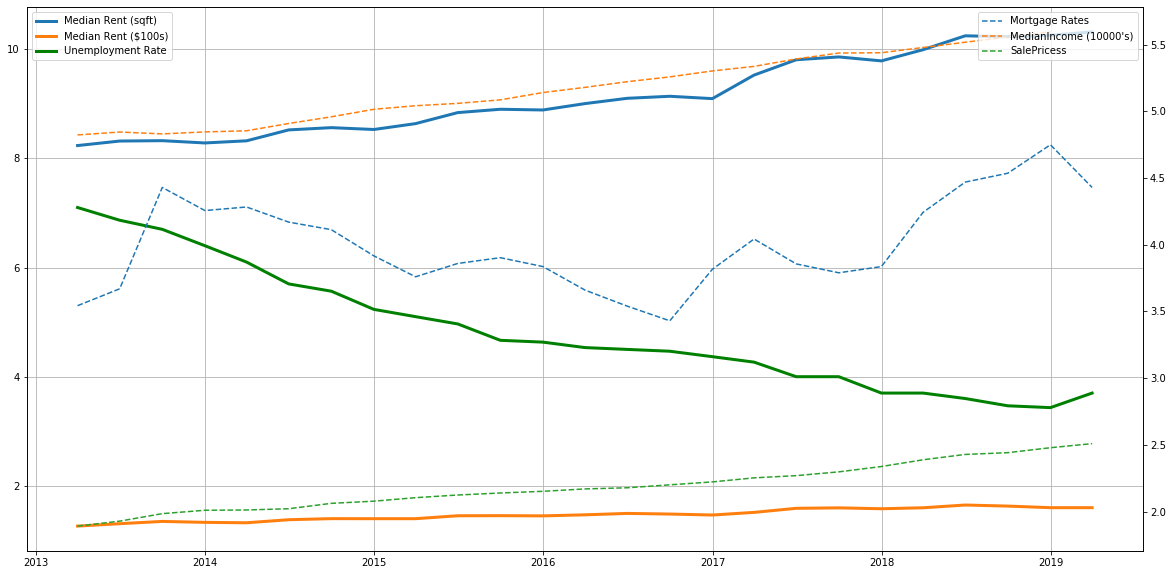

,Year,Month,Quarter,RentalRateSqFt,UnemploymentRate,RentalRate,MortgageRate,Listings,SaleCounts,SalePrices,MedianIncome
Date,,,,,,,,,,,
2013-01-01,2013,1,1,0.817461,7.4,1250.0,3.46,18950.5,2118.0,189500.0,48236.435
2013-02-01,2013,2,1,0.821955,7.0,1250.0,3.58,18459.0,1870.0,188400.0,48236.435
2013-03-01,2013,3,1,0.831094,6.9,1288.0,3.59,19230.5,2348.0,189300.0,48236.435
2013-04-01,2013,4,2,0.831767,6.9,1295.0,3.42,20254.0,2951.0,191500.0,48455.295
2013-05-01,2013,5,2,0.830218,6.8,1300.0,3.59,21811.0,3331.0,192150.0,48455.295


In [15]:
title = 'Rental Rates vs Unemployment by Year'

fig, ax1 = plt.subplots(figsize=(20,10))

df = metrics_yearly.resample('Q').mean()
x_axis = df.index

#OUR HYPOTHSIS METRICS
y_axis = df['RentalRateSqFt']*10
ax1.plot(x_axis,y_axis, label='Median Rent (sqft)', linestyle='solid',linewidth=3)

y_axis = df['RentalRate']/1000
ax1.plot(x_axis,y_axis, label='Median Rent ($100s)',linestyle='solid',linewidth=3)

ax2 = ax1.twinx()
y_axis = df['UnemploymentRate']
ax1.plot(x_axis,y_axis, label='Unemployment Rate', c='g',linestyle='solid',linewidth=3)

#OTHER FACTORS AS POTENTIAL INFLUENCERS
y_axis = df['MortgageRate']
ax2.plot(x_axis,y_axis, label='Mortgage Rates', linestyle='dashed')

y_axis = df['MedianIncome']/10000
ax2.plot(x_axis,y_axis, label=f"MedianIncome (10000's)",linestyle='dashed')

y_axis = df['SalePrices']/100000
ax2.plot(x_axis,y_axis, label='SalePricess', linestyle='dashed')

# Turn on the grid
ax1.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)

# Save the Figure
plt.savefig(f"figures\{title.replace(' ','_')}.png")

plt.show()
metrics_yearly.head()

### Scatter Matrix of All Observations

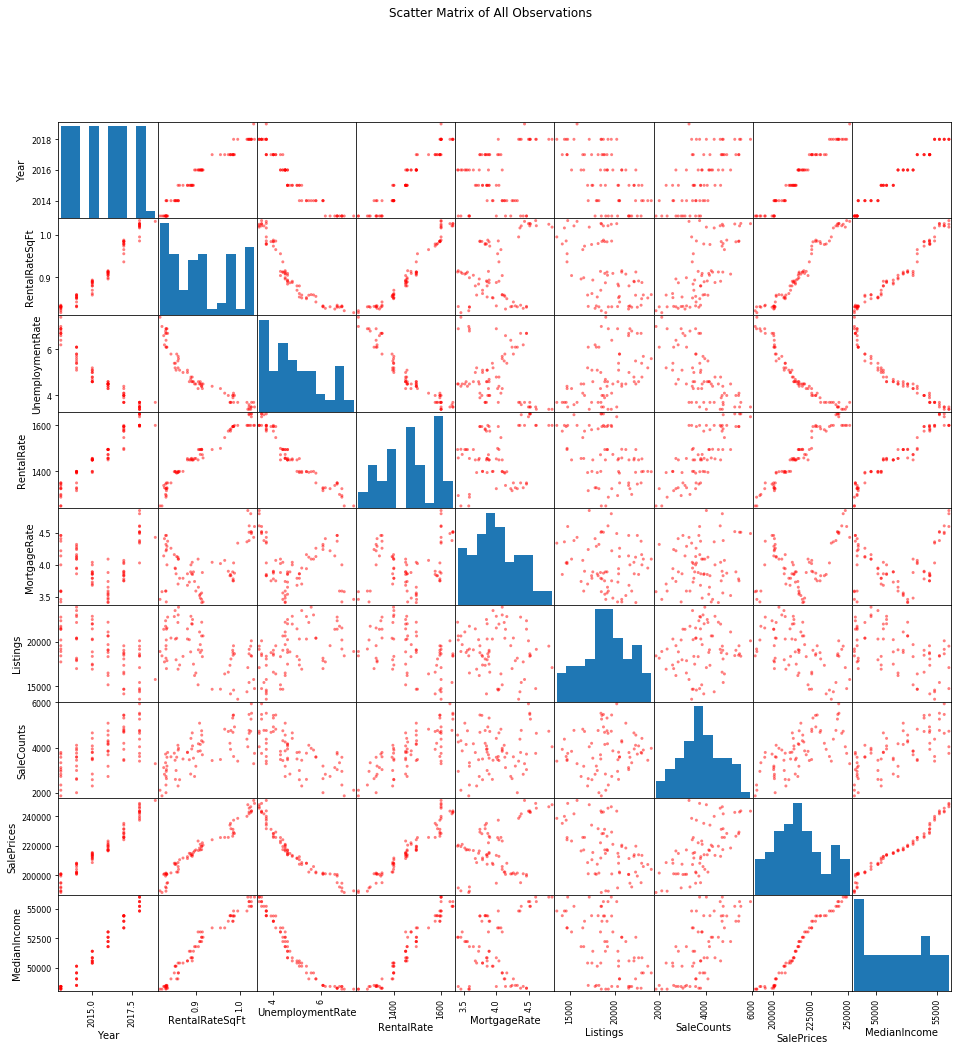

In [20]:
title = 'Scatter Matrix of All Observations'

#drop our date column from this scatter_matrix seems useless since it's not historical data
df = metrics_yearly.drop(columns=['Month','Quarter'])

#scatter_matrix(df, figsize=(12,12), grid=True, diagonal='kde', alpha=0.2, color='royalblue')
scatter_matrix(df, figsize=(16,16), grid=True, color='r')

plt.suptitle(f'{title}')
#plt.style.use('ggplot')

# Save the Figure
plt.savefig(f"figures\{title.replace(' ','_')}.png")

# Show the Figure
plt.show()

### Mortgage Rates by Year

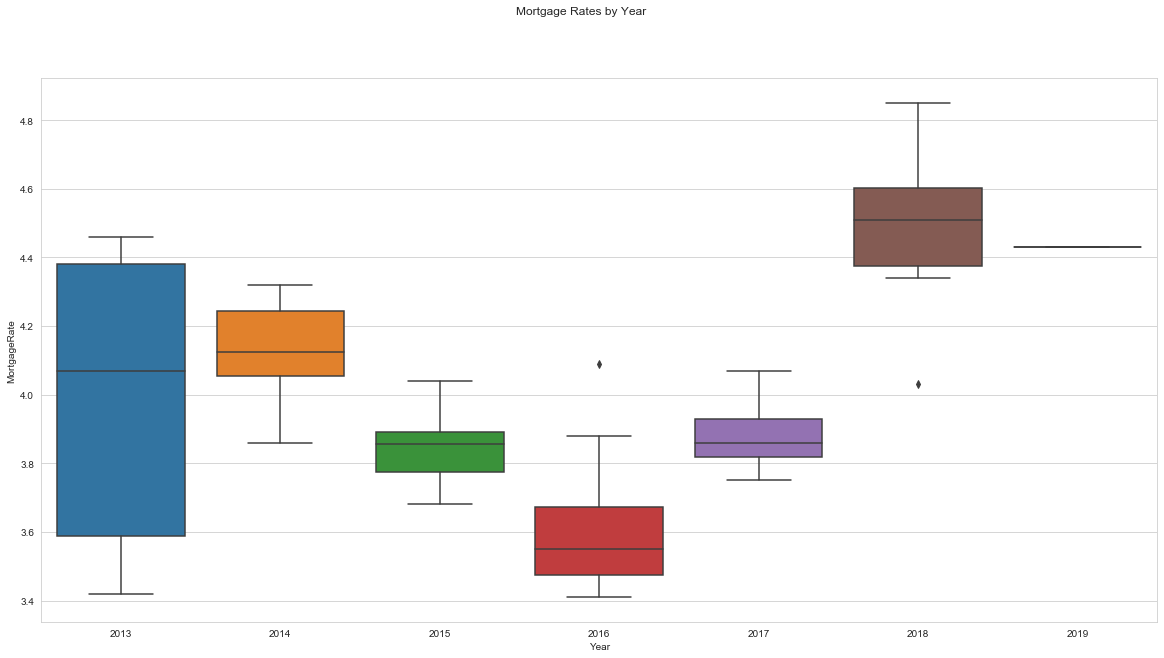

,Year,Month,Quarter,RentalRateSqFt,UnemploymentRate,RentalRate,MortgageRate,Listings,SaleCounts,SalePrices,MedianIncome
Date,,,,,,,,,,,
2013-01-01,2013,1,1,0.817461,7.4,1250.0,3.46,18950.5,2118.0,189500.0,48236.435
2013-02-01,2013,2,1,0.821955,7.0,1250.0,3.58,18459.0,1870.0,188400.0,48236.435
2013-03-01,2013,3,1,0.831094,6.9,1288.0,3.59,19230.5,2348.0,189300.0,48236.435
2013-04-01,2013,4,2,0.831767,6.9,1295.0,3.42,20254.0,2951.0,191500.0,48455.295
2013-05-01,2013,5,2,0.830218,6.8,1300.0,3.59,21811.0,3331.0,192150.0,48455.295


In [21]:
title = 'Mortgage Rates by Year'

plt.figure(figsize=(20,10))

df = metrics_yearly.copy()

sns.set_style("whitegrid")
sns.set_style({'axes.grid':True})

sns.boxplot(x=df['Year'],y=df['MortgageRate'],data=df)



plt.suptitle(f'{title}')

# Save the Figure
plt.savefig(f"figures\{title.replace(' ','_')}.png")

plt.show()
df.head()

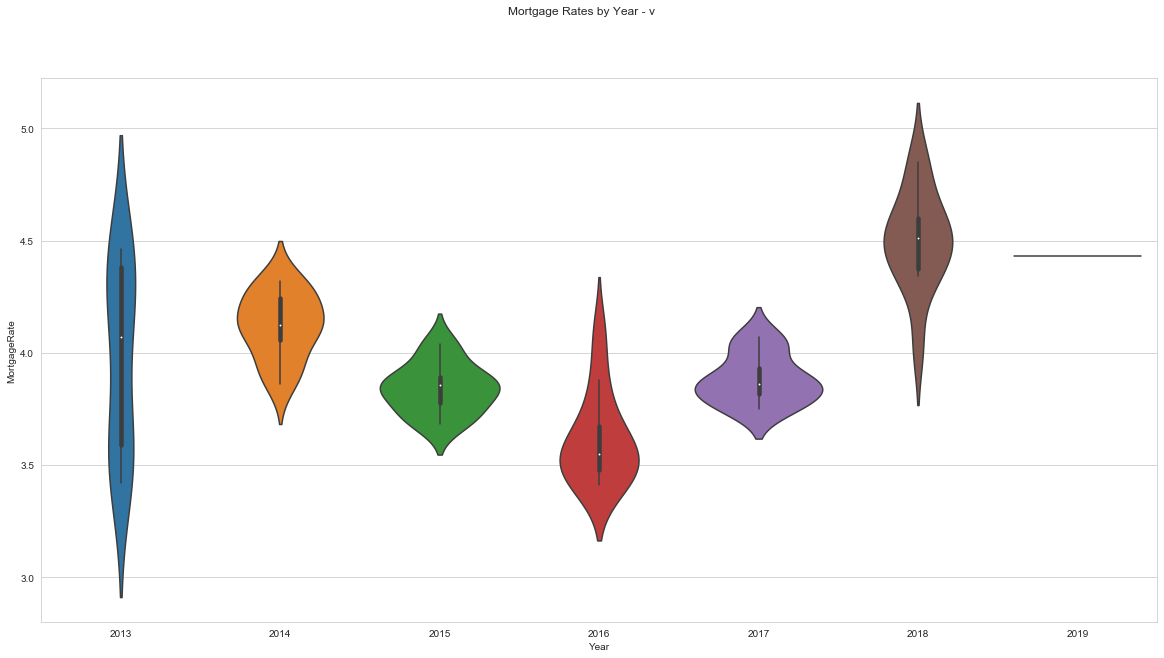

,Year,Month,Quarter,RentalRateSqFt,UnemploymentRate,RentalRate,MortgageRate,Listings,SaleCounts,SalePrices,MedianIncome
Date,,,,,,,,,,,
2013-01-01,2013,1,1,0.817461,7.4,1250.0,3.46,18950.5,2118.0,189500.0,48236.435
2013-02-01,2013,2,1,0.821955,7.0,1250.0,3.58,18459.0,1870.0,188400.0,48236.435
2013-03-01,2013,3,1,0.831094,6.9,1288.0,3.59,19230.5,2348.0,189300.0,48236.435
2013-04-01,2013,4,2,0.831767,6.9,1295.0,3.42,20254.0,2951.0,191500.0,48455.295
2013-05-01,2013,5,2,0.830218,6.8,1300.0,3.59,21811.0,3331.0,192150.0,48455.295


In [22]:
title = 'Mortgage Rates by Year - v'

plt.figure(figsize=(20,10))

sns.set_style("whitegrid")
sns.set_style({'axes.grid':True})

df = metrics_yearly.copy()

sns.violinplot(x=df['Year'],y=df['MortgageRate'],data=df)

plt.suptitle(f'{title}')

# Save the Figure
plt.savefig(f"figures\{title.replace(' ','_')}.png")

plt.show()
df.head()

### Geodata Munging

In [ ]:
#build state name / id xref
with open(state_geo) as json_file:
    state_geo_df = json.load(json_file)
state_geo_xref = json_normalize(state_geo_df['features']).filter(items=['id','properties.name'])
state_geo_xref = state_geo_xref.rename(columns={'id':'State','properties.name':'StateName'})#.set_index('State')
state_geo_xref.head()

In [ ]:
# create geodataframe and add centroids
gdf = gpd.GeoDataFrame.from_features(state_geo_df)
gdf['centroid_lon'] = gdf['geometry'].centroid.x
gdf['centroid_lat'] = gdf['geometry'].centroid.y
gdf.crs = {'init' :'epsg:4326'}
gdf.head()

In [ ]:
#merge w/ data points
median_rental_price_mfr_state_year = median_rental_price_mfr_src.copy()
median_rental_price_mfr_state_year = median_rental_price_mfr_state_year.merge(state_geo_xref, left_on='State', right_on='State')
median_rental_price_mfr_state_year.set_index(['RegionName','State','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_mfr_state_year.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr_state_year.columns],names=['Year','Month'])
median_rental_price_mfr_state_year = median_rental_price_mfr_state_year.stack().reset_index().groupby(['State','StateName']).median().drop(columns='SizeRank')
gdf_income_tax = gdf.merge(median_rental_price_mfr_state_year.reset_index(),how='right', left_on='name', right_on='StateName')
gdf_income_tax = gdf_income_tax.fillna(method='bfill',axis=1).dropna(how='all',axis=1)
gdf_income_tax.head()

In [ ]:
#unemployment_rate_state = unemployment_rate_state_src.set_index('State').merge(state_geo_xref,left_index=True,right_index=True)

years = [col for col in gdf_income_tax.columns if col not in ['geometry','name','centroid_lon','centroid_lat','State','StateName']]



#render the map
map_name = 'Median Rent ($)'
#m = folium.Map(location=[np.median(gdf_income_tax['centroid_lat'].tolist()), np.median(gdf_income_tax['centroid_lon'].tolist())], tiles='Stamen Toner', zoom_start=12)

m = folium.Map([43, -100], zoom_start=4)

for year in years:
    yr = folium.Choropleth(
    geo_data=state_geo,
    data=gdf_income_tax,
    columns=['State', year],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= f'{year} - {map_name}',
    #overlay=True,
    name = year
    )
    m.add_child(yr)
    # add markers with basic information
    fg = folium.FeatureGroup(name=f'{year}-Rent')
    for lat, lon, val, name in zip(gdf_income_tax['centroid_lat'].tolist(), gdf_income_tax['centroid_lon'].tolist(), gdf_income_tax[year].tolist(), gdf_income_tax['name'].tolist()):
        html = f"""
        <h2>{name}<\h2><br>
        <h4>Median Rent ({year}): {int(round(val,0))} HUF <\h4>
        """
        fg.add_child(folium.Marker(location=[lat, lon], popup=html))
    m.add_child(fg)

folium.LayerControl().add_to(m)
m.save(map_name+'.html')

m